## Index

- <a href = #link1> Exploratory Data Analysis (EDA) </a>
- <a href = #link2> Insights based on EDA </a>
- <a href = #link3> Data Pre-processing </a>
- <a href = #link4> Model building - Bagging </a>
- <a href = #link5> Model performance evaluation and improvement </a>
- <a href = #link6> Model building - Boosting </a>
- <a href = #link7> Model performance evaluation and improvement </a>
- <a href = #link8> Actionable Insights and Recommendations </a>

## <a id = "link1"></a> Exploratory Data Analysis (EDA)

In [201]:
import warnings
warnings.filterwarnings("ignore")
import openpyxl
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [124]:
xls = pd.ExcelFile('Tourism.xlsx')
Tourism = pd.read_excel(xls, 'Tourism')

In [125]:
Tourism.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [126]:
Tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [127]:
Tourism.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [128]:
#Quite a few missing values - replacing with median and mode values
data = Tourism.drop('CustomerID', axis = 1)
data = data.fillna(data.median())
data['TypeofContact'].fillna(data['TypeofContact'].mode()[0], inplace=True)

In [129]:
#Replacing some bad values 
data['Gender'] = data['Gender'].str.replace('Fe Male','Female')

In [130]:
# Number of followups,PreferredPropertyStar, Number of trips, NumberOfChildrenVisited should be an integer not a continuous value 
data['NumberOfFollowups'] = data['NumberOfFollowups'].astype('int64')
data['NumberOfChildrenVisited'] = data['NumberOfChildrenVisited'].astype('int64')
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].astype('int64')
data['NumberOfTrips'] = data['NumberOfTrips'].astype('int64')

In [132]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.00,1.0
Age,4888.0,37.547259,9.104795,18.0,31.0,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.00,3.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.00,5.0


### Univariate Analysis

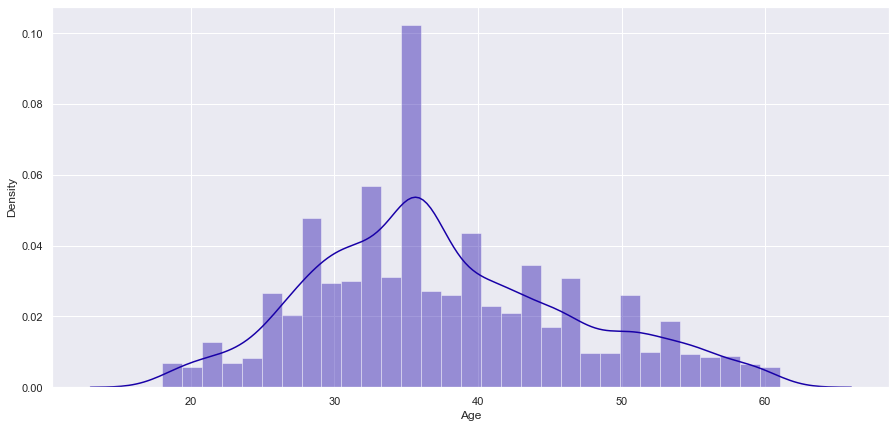

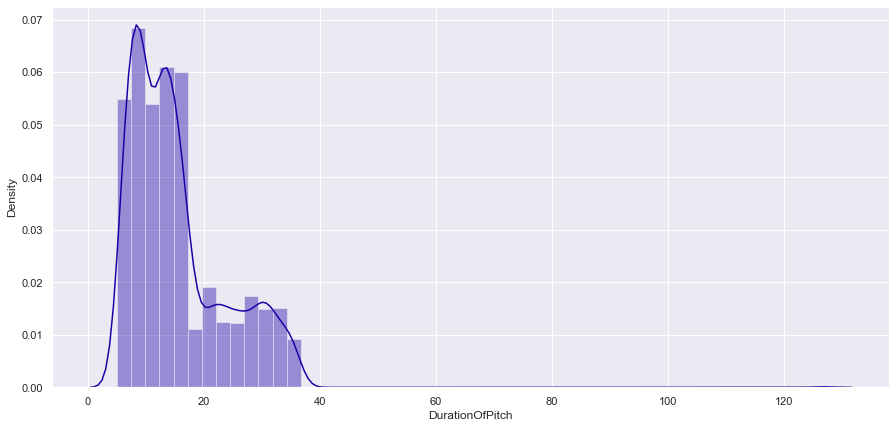

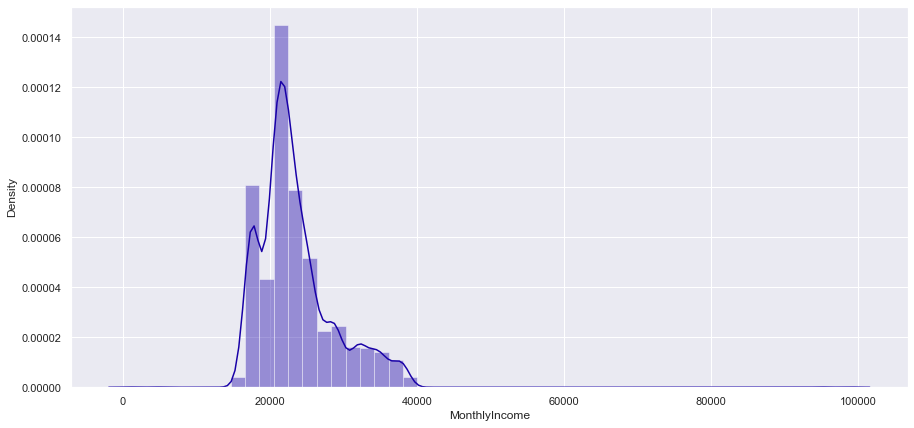

In [133]:
countinous_cols = list(data.select_dtypes(include=['float64']))

for i in countinous_cols:
    sns.distplot(data[i])
    plt.show()

In [134]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

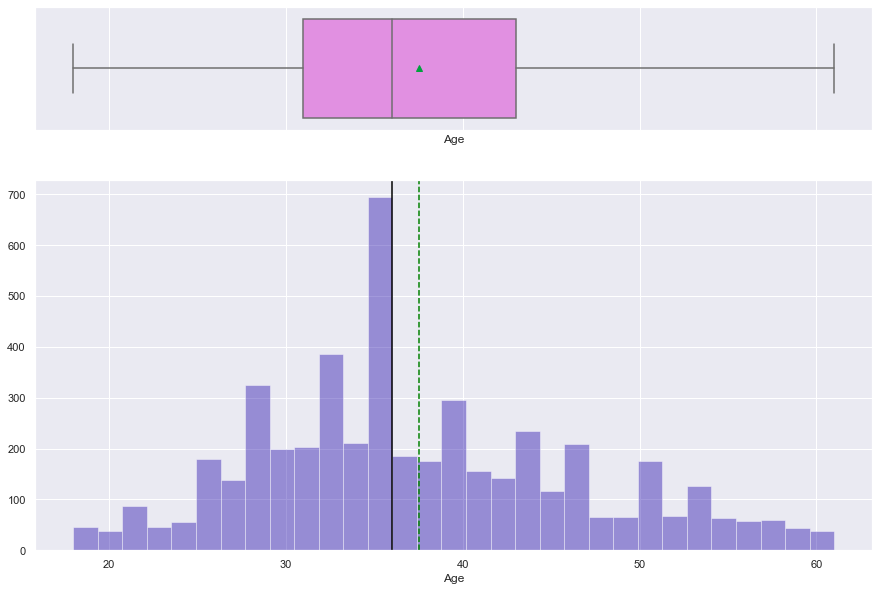

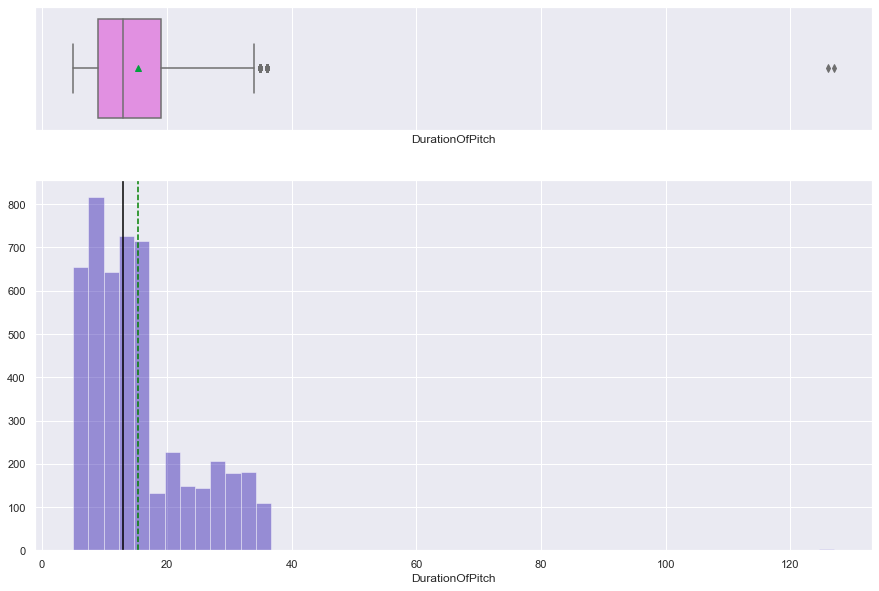

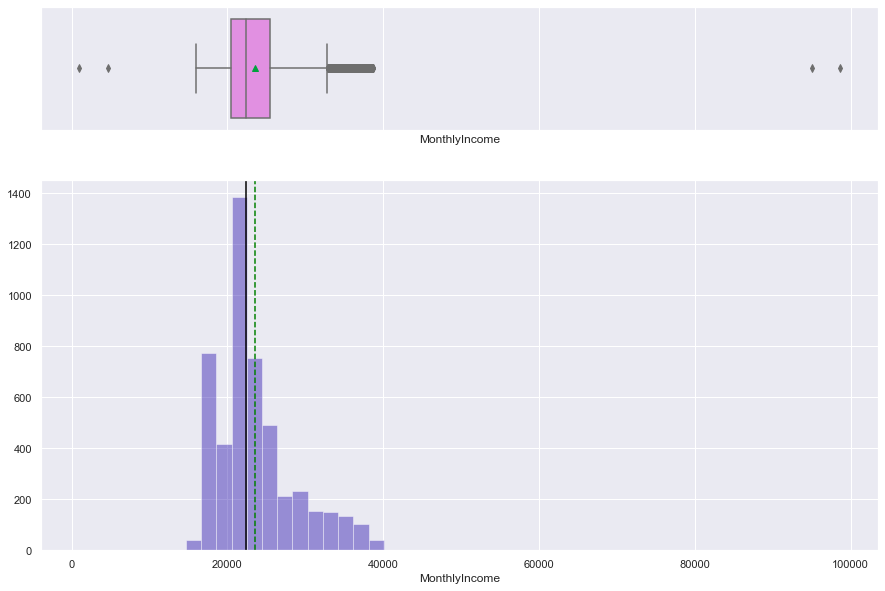

In [135]:
for i in countinous_cols:
    histogram_boxplot(data[i])
    plt.show()

In [136]:
#convert objects to categories:
categs = list(data.select_dtypes(include=['object']))
for i in categs:
        data[i] = data[i].astype('category')

In [152]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

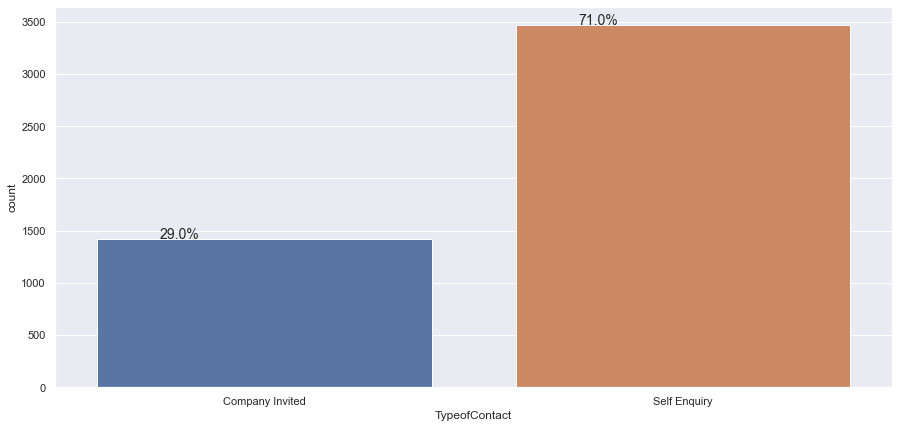

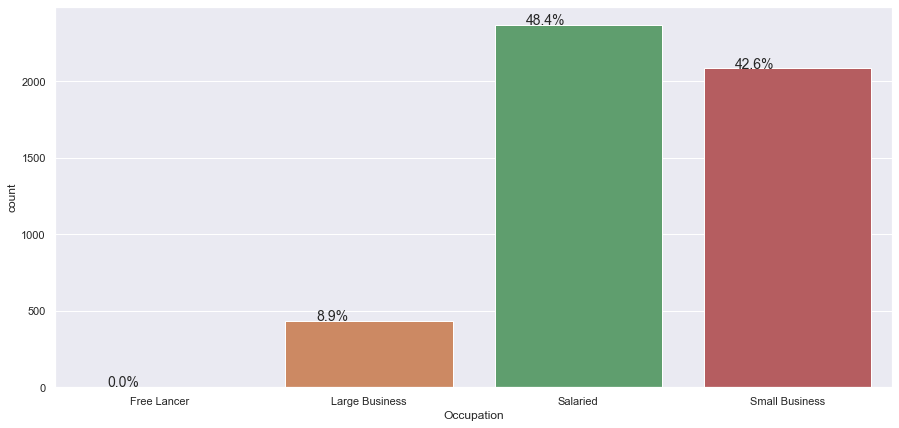

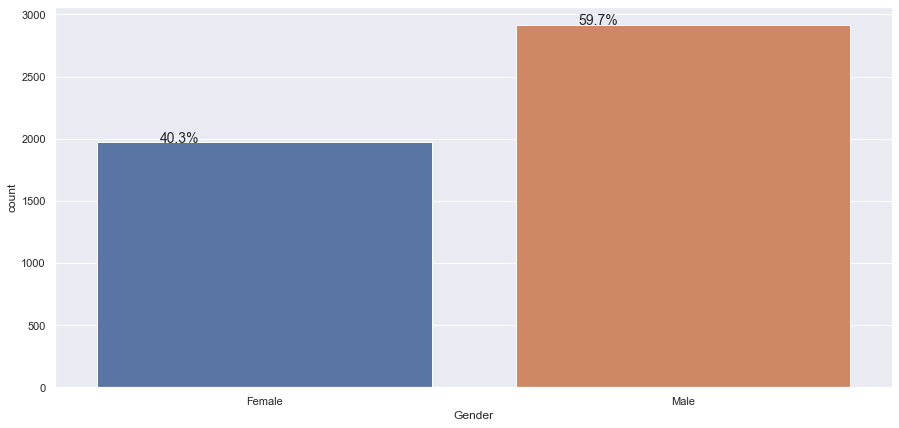

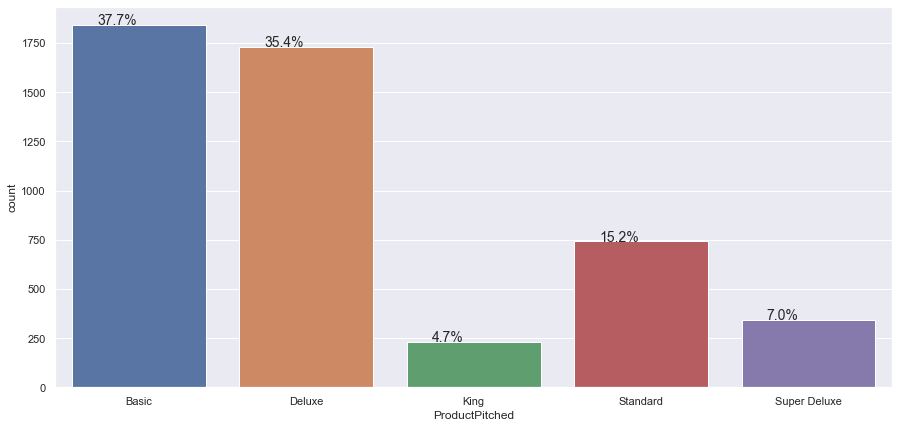

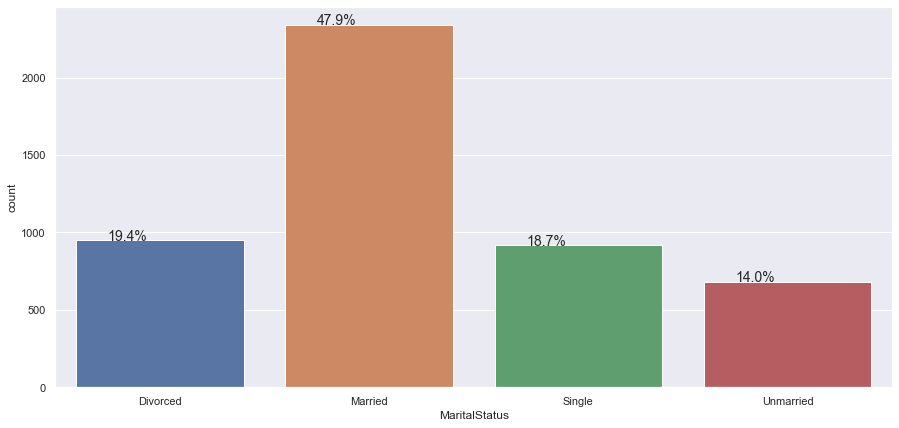

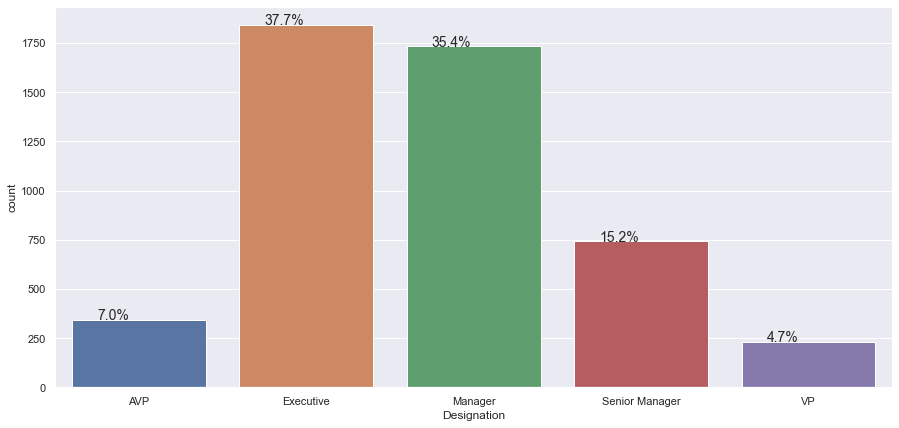

In [153]:
categories = list(data.select_dtypes(include=['category']))
for i in categories:
        perc_on_bar(data[i])
        plt.show()

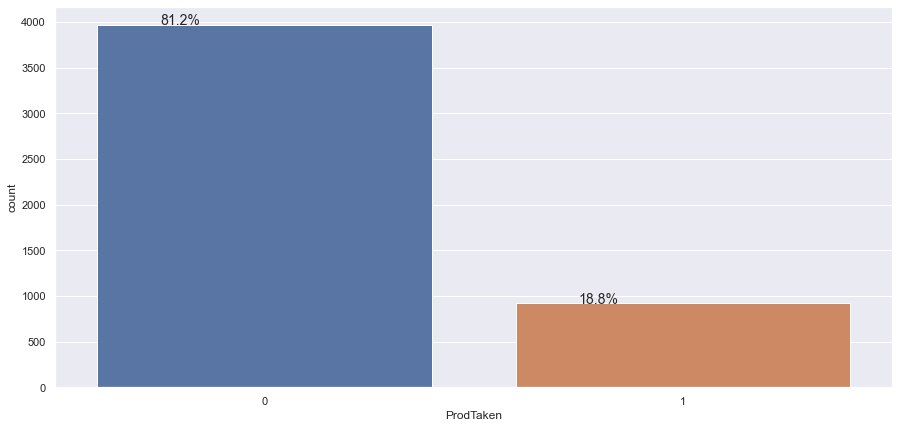

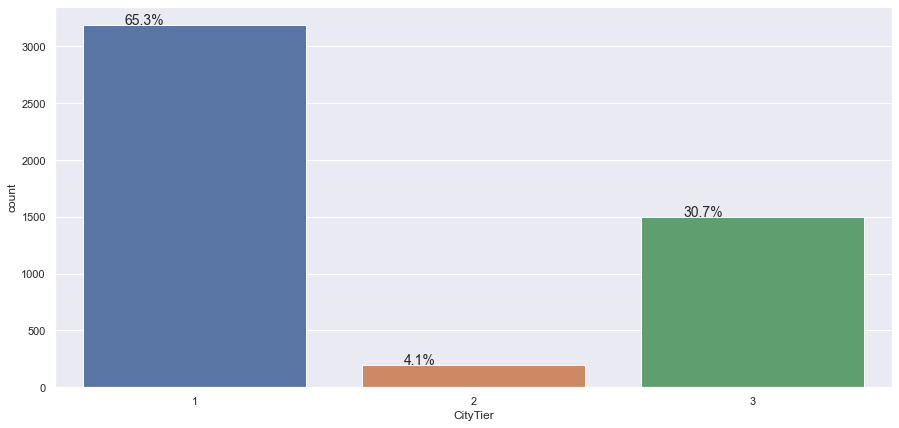

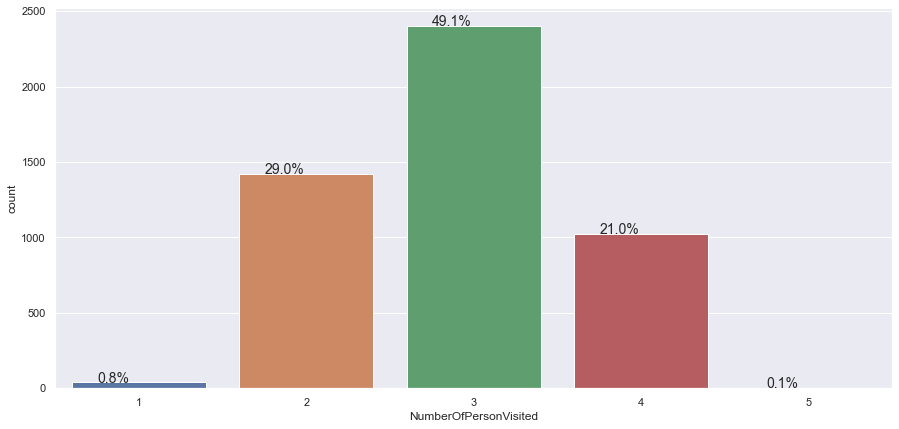

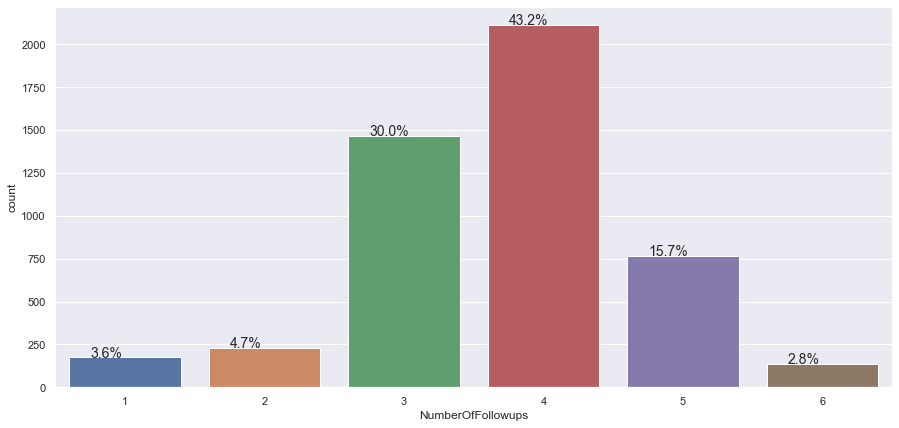

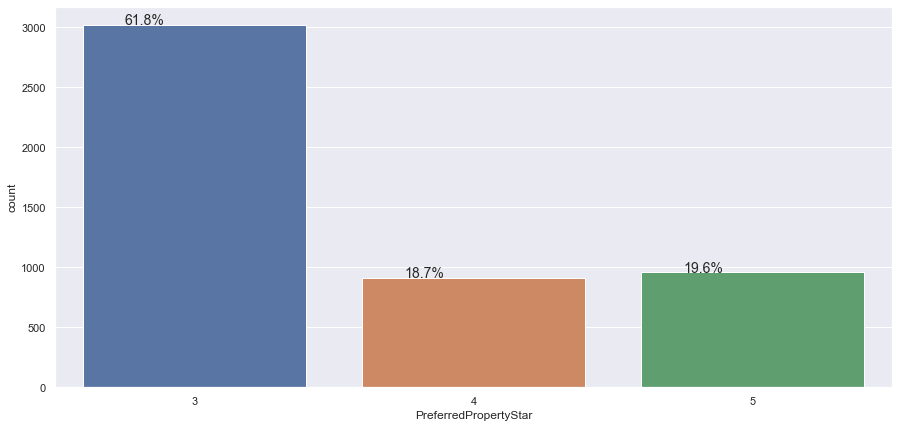

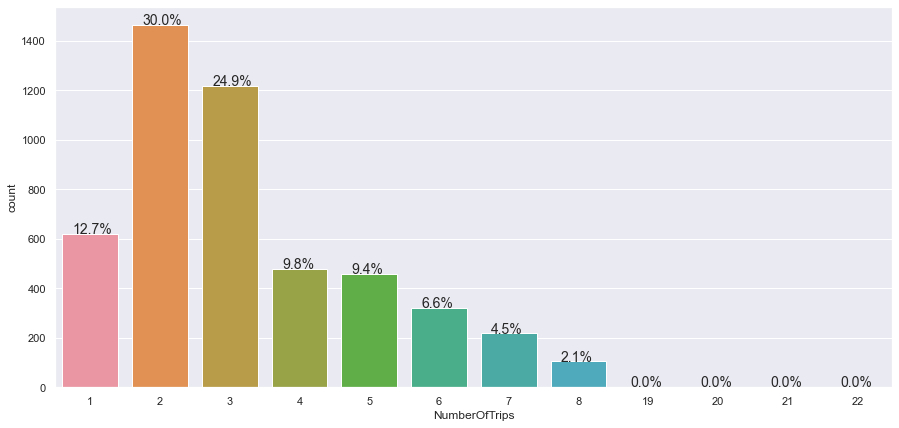

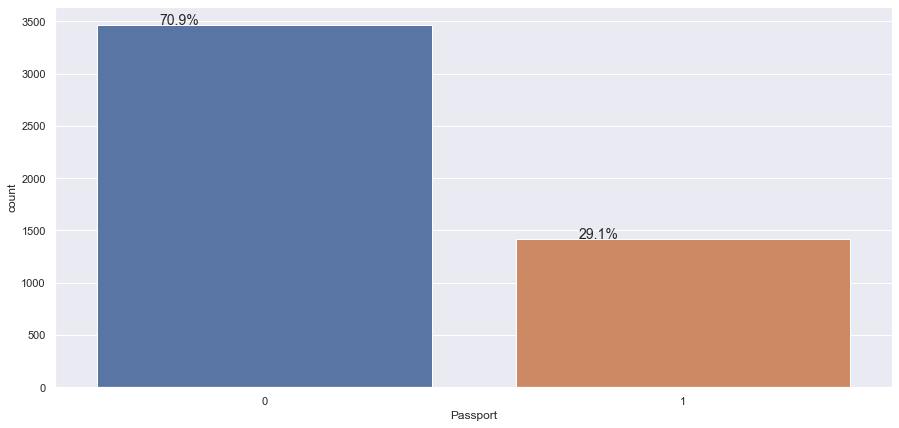

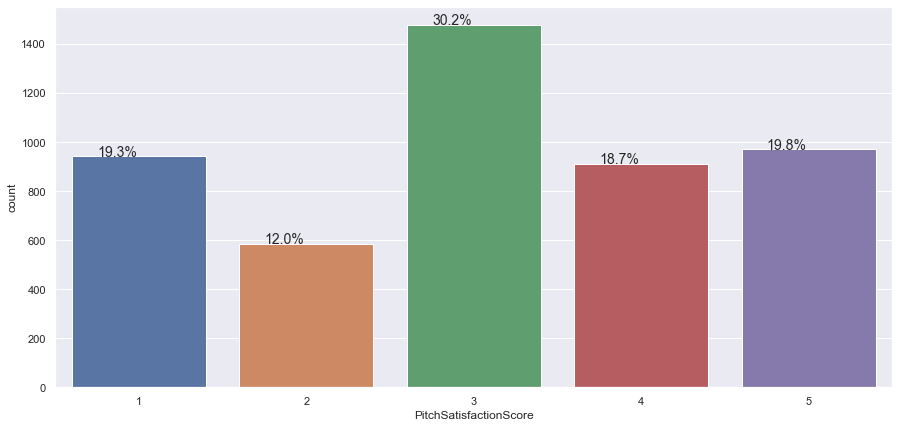

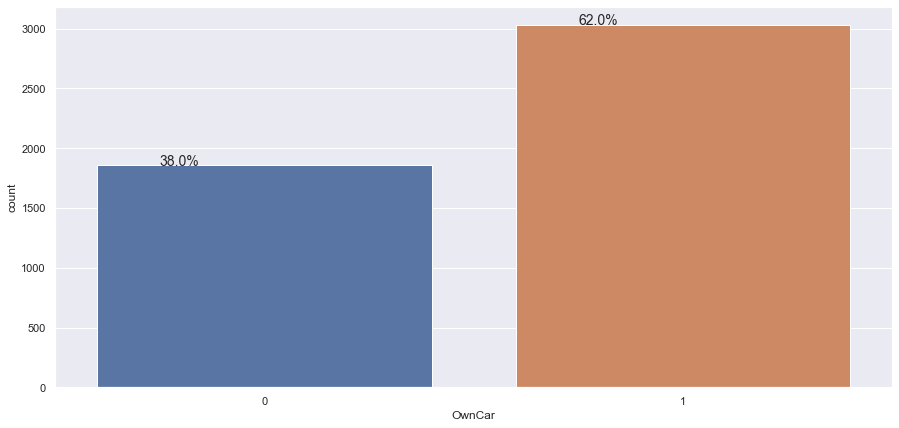

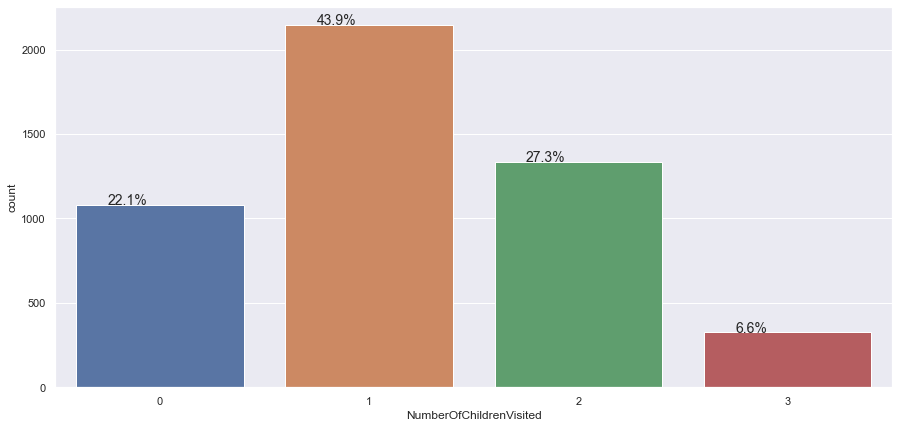

In [139]:
integer = list(data.select_dtypes(include=['int64']))
for i in integer:
        perc_on_bar(data[i])
        plt.show()

## <a id = "link4"></a> Bivariate analysis

In [86]:
#Bivariate
data.groupby(['ProdTaken']).mean()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
ProdTaken,,,,,,,,,,,,
0,38.177419,1.615927,15.056704,2.901714,3.657510,3.540071,3.212450,0.233871,3.044355,0.622984,1.181452,23879.207157
1,34.829348,1.819565,16.683696,2.919565,3.942391,3.741304,3.304348,0.536957,3.223913,0.608696,1.198913,22178.885870


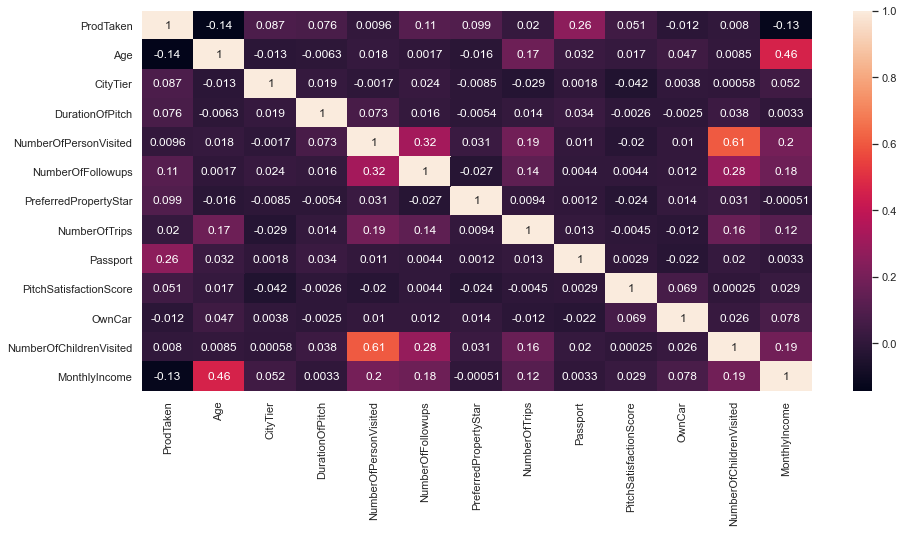

In [62]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Notes:
Product taken has highest correlation with passport and also has negative correlation with age
Number of children visited and number of pursons visited show correlation  (0.61), which could mean that when customers are bringing someone its likely to be their children. Age is also correlated with income (0.46%)

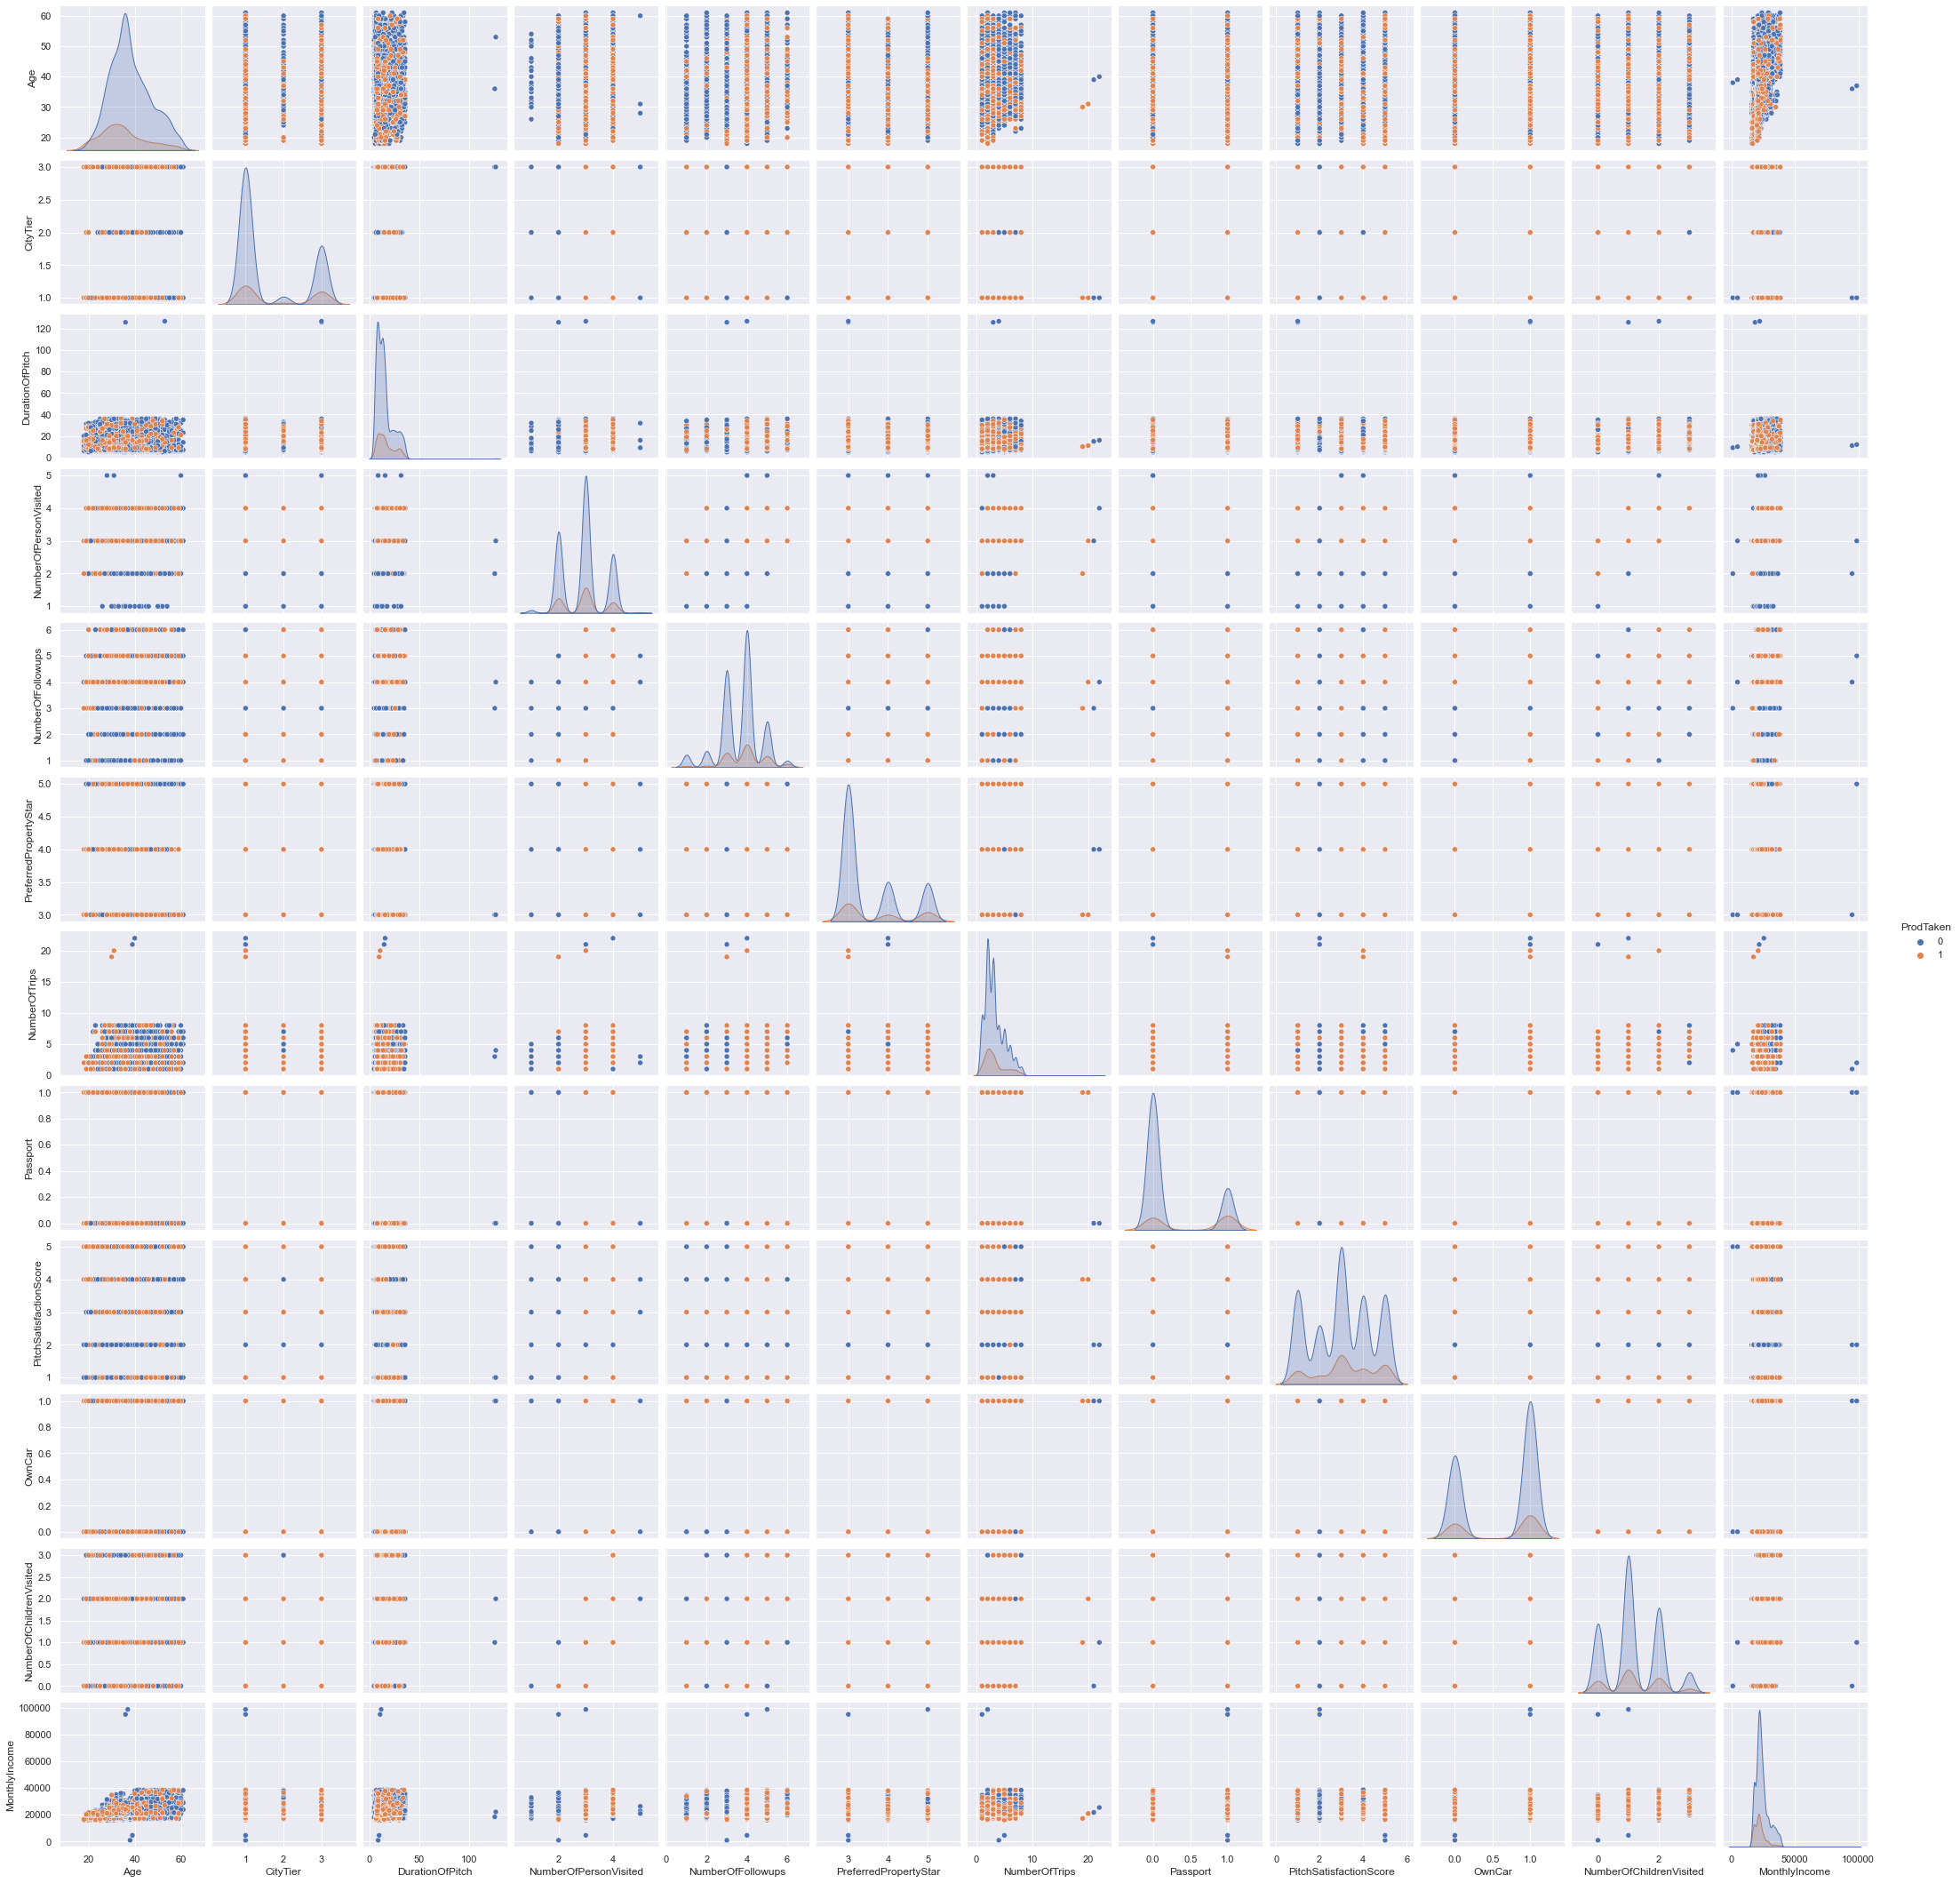

In [64]:
sns.pairplot(data=data,hue="ProdTaken",)
plt.show()

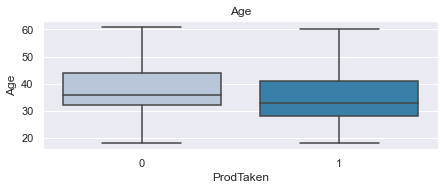

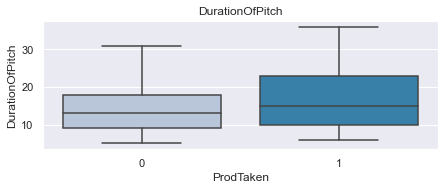

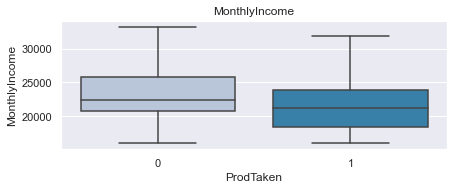

In [67]:
for j in countinous_cols:
    cols = data[[j]].columns.tolist()
    plt.figure(figsize=(12,7))

    for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
    plt.show()

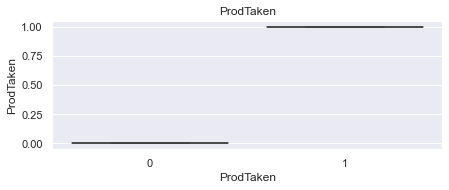

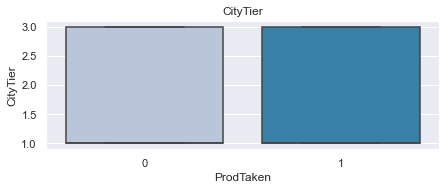

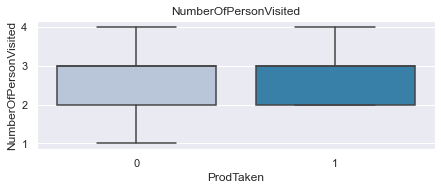

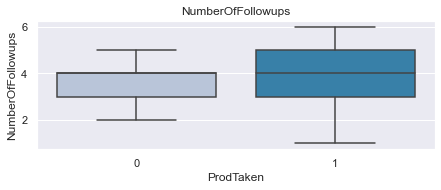

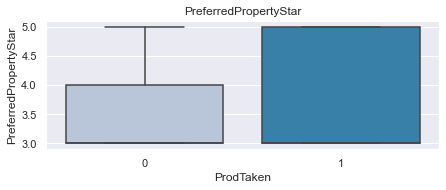

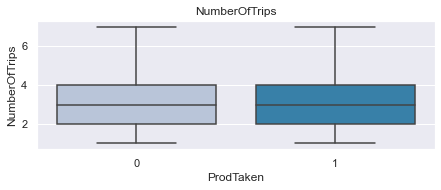

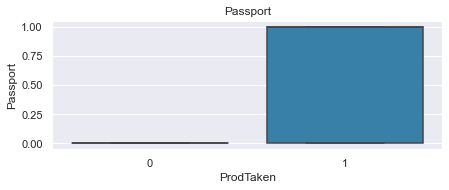

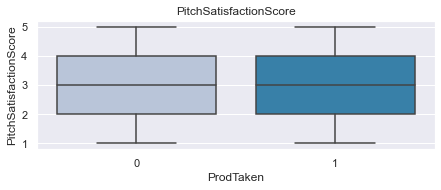

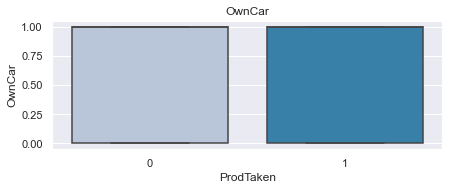

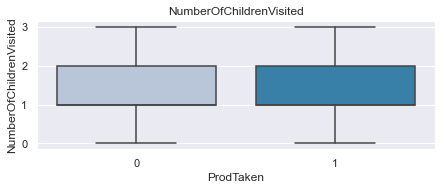

In [100]:
for j in integer:
    cols = data[[j]].columns.tolist()
    plt.figure(figsize=(12,7))

    for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
    plt.show()

In [103]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


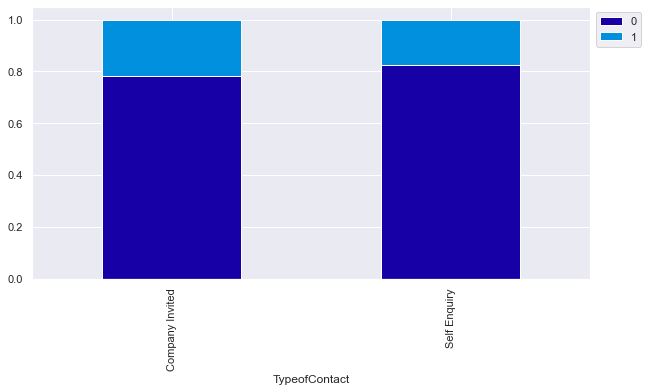

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


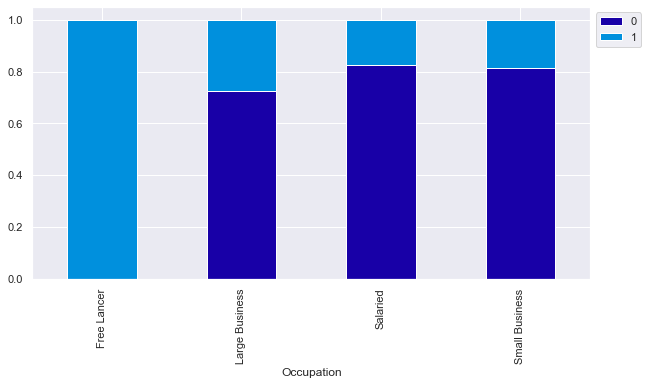

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


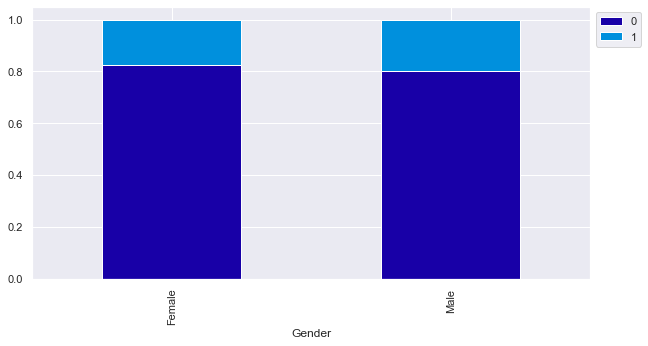

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


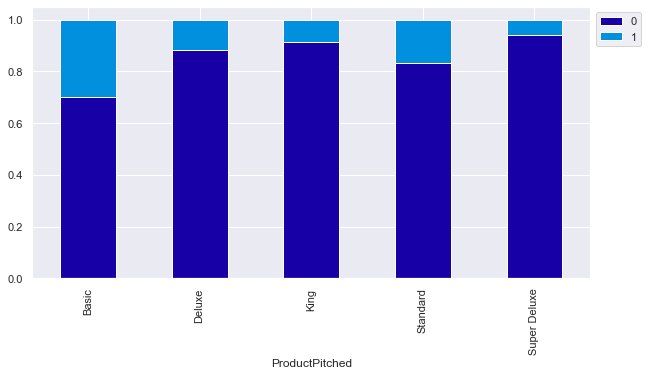

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


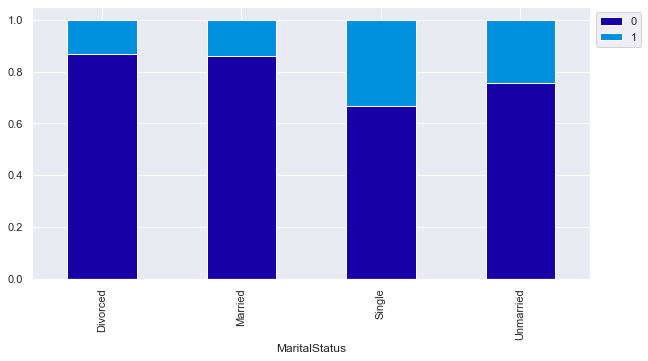

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


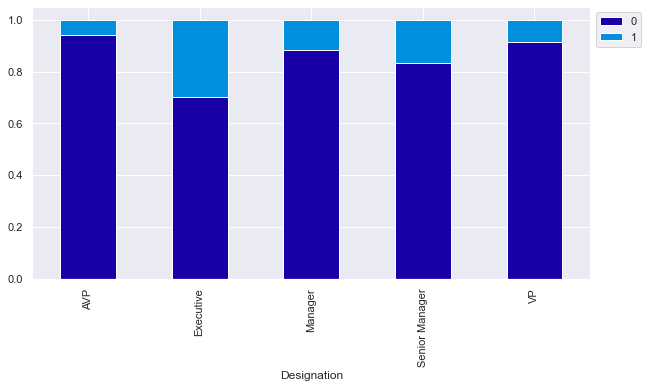

In [105]:
for i in categories:
        stacked_plot(data[i])
        plt.show()

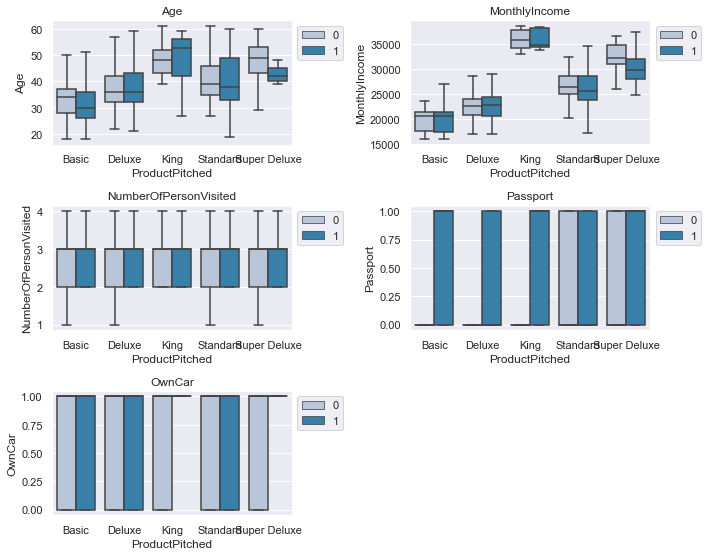

In [147]:
cols = data[['Age','MonthlyIncome','NumberOfPersonVisited','Passport',  'OwnCar']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(data["ProductPitched"],data[variable],hue=data['ProdTaken'],palette="PuBu", showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

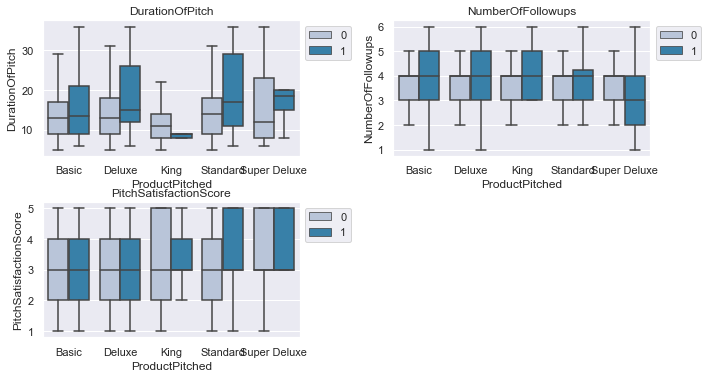

In [148]:
cols = data[['DurationOfPitch','NumberOfFollowups', 'PitchSatisfactionScore']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(data["ProductPitched"],data[variable],hue=data['ProdTaken'],palette="PuBu", showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

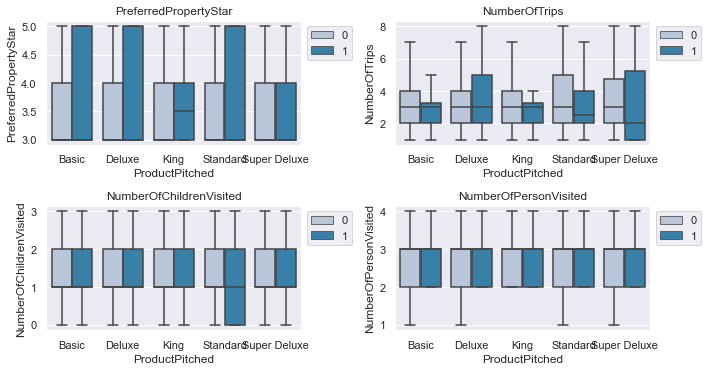

In [149]:
cols = data[['PreferredPropertyStar','NumberOfTrips', 'NumberOfChildrenVisited', 'NumberOfPersonVisited']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(data["ProductPitched"],data[variable],hue=data['ProdTaken'],palette="PuBu", showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

In [155]:
def perc_on_bar2(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, hue = 'ProductPitched')
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

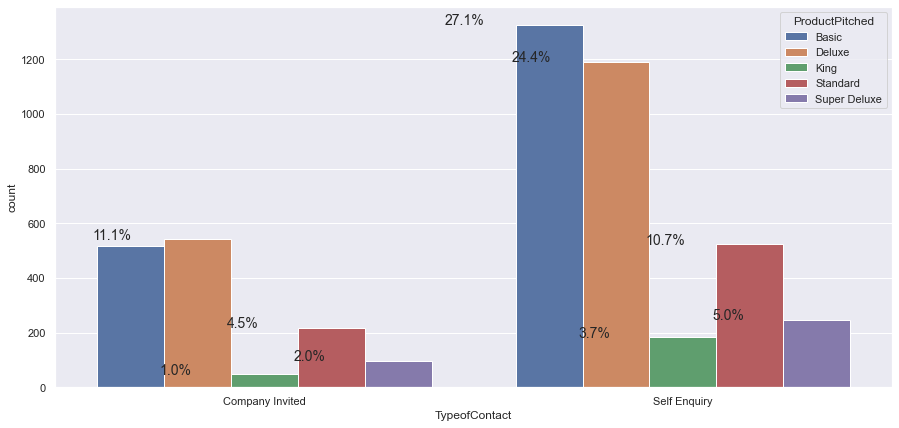

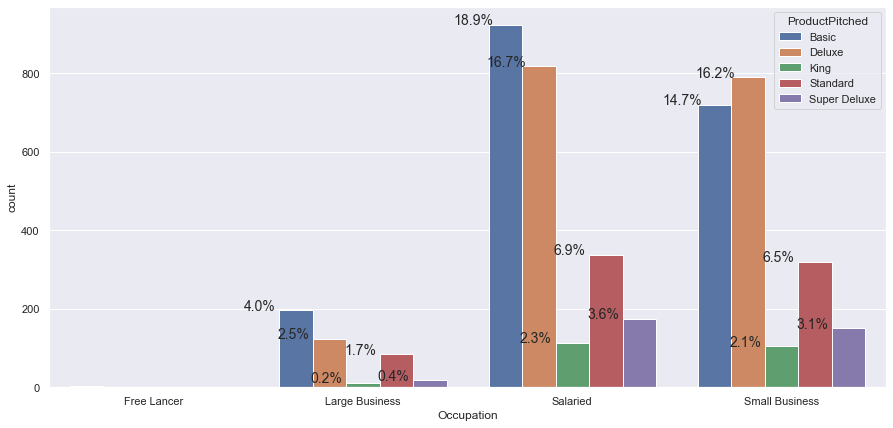

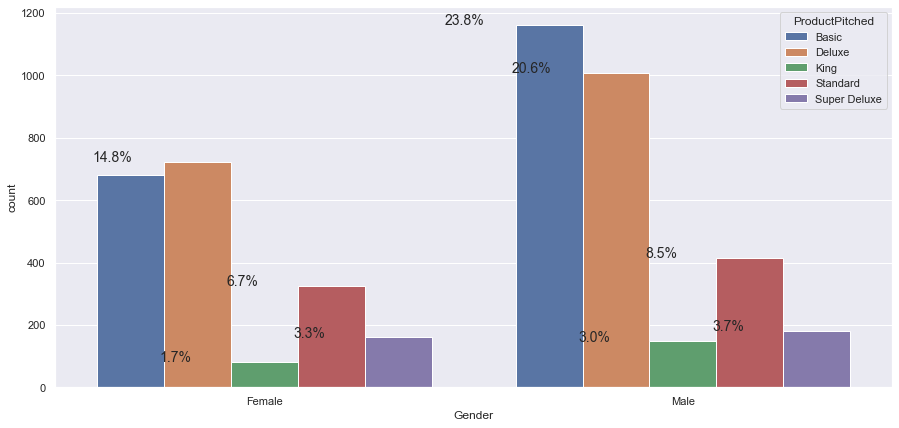

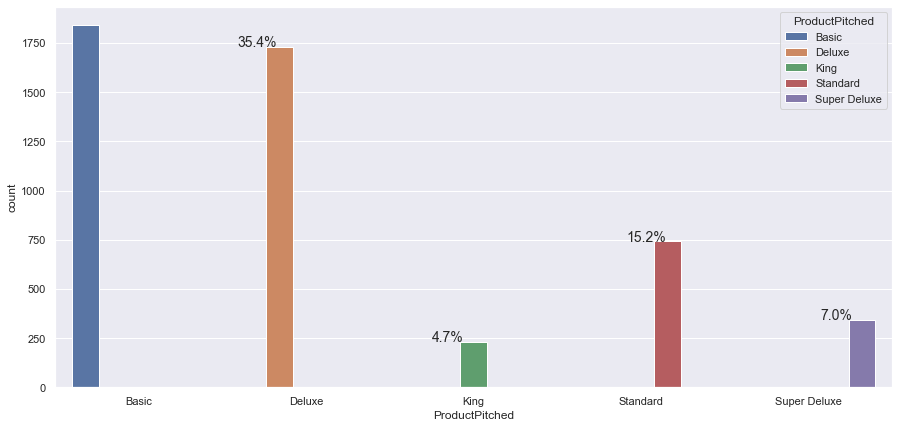

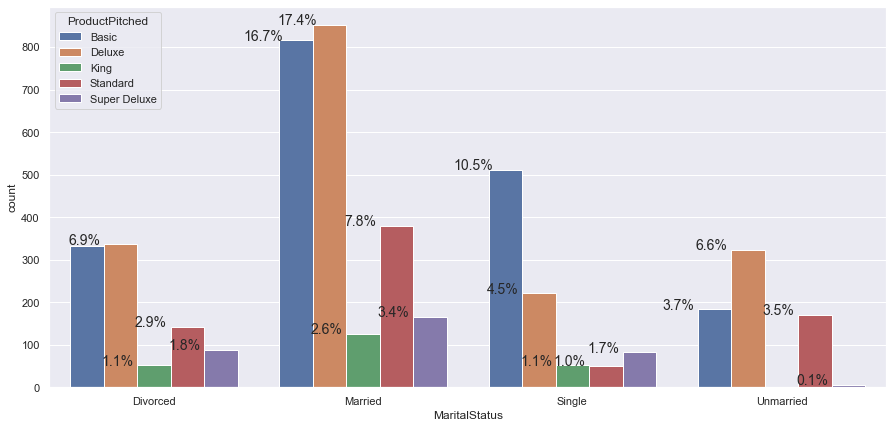

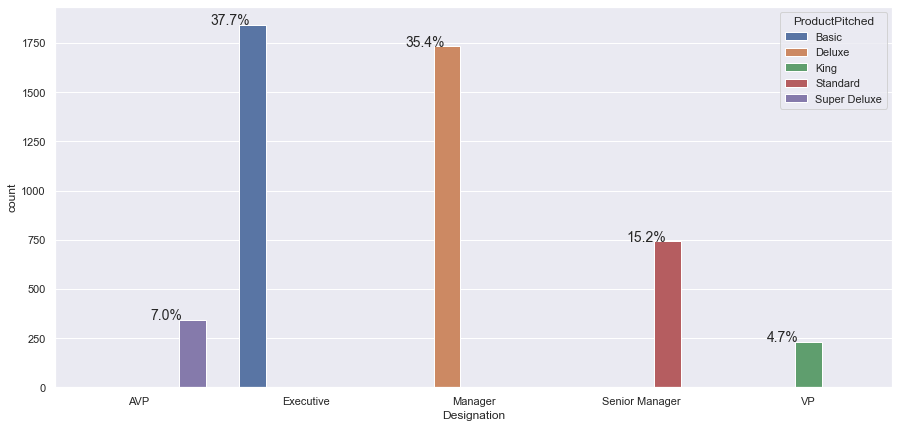

In [156]:
for i in categories:
        perc_on_bar2(data[i])
        plt.show()

## <a id = "link2"></a> Insights based on EDA

### Customer Profile based on different packages

- Basic: 
Customers in early thirties with monthly income around 20K. They usually bring 1-2 other people (their kids) with them on a trip. A successful pitch with this group is around 13 minutes with 3-5 followups. These customers prefer to stay in higher than average rated hotels. Those with a passport were more likely to purchase a trip.

- Standard:
Customers in their 40s with monthly income 25K+.They bring on vacation with them 1-2 other people, friends or children. Successful pitches with this group are around 18 minutes and require 3-4 follow ups. Those with a passport were more likely to purchase a trip.

- Delux: 
Customers in their mid-30s, with a monthly income between 20K-25K. Those with a passport were more likely to purchase a trip. Successful pitches lasted around 15 minutes. 

- Super Delux:
Customers in their mid-late 40s with the monthly income of 30K. The pitch was around 20 minutes, included 2-4 follow ups and those customers gave the pitch a higher satisfaction score. This group of customes does own a car. They tend to prefer lower rated hotels (3-4 stars). 

- King: 
Older customers (50+) with highest income. The pitch "to seal the deal" was only around 10 minutes with approximately 4 follow ups. These customers gave high satisfaction sore to the pitch. They also travel the most and prefer to stay at lower rated hotels. These customers do own a car.

The company pitched mostly Basic and Delux packages. It seems that company mostly used the person's job title when choosing what product to pitch, thus, executives got the most pitches all of which were basic package. Managers were pitched Delux, Senior managers Standard, and VPs and AVPs got pitches about King and Super Delux packages respectively.

Having a passport on hand and longer pitches with sales representatives caracterized those customers who ended up purchasing a travel package. This could simply mean that the customers were already interested in buying a package and were asking more questions about the product. Most customers bring 1-2 other people (friends or children) with them to a vacation.


When looking at the percent of total, basic package, singles, unmarried couples, executives and managers stand out as categories of customers who ended up purchasing a trip. On the other hand, type of contact and gender had no impact on whether a customer was going to buy a trip or not.

### General Customer Overview
#### Demographics:
- 19% of the customers purchased a package last year.
- 65% of customers live in a tier 1 city, 31% in tier 3, 4% in tier 2. 
- Almost a half of all customers (48%) are salaried professionals, followed by small business owners (43%). The rest of the customers engage in large business or free lance work.
- 60% of all customers are male
- Observations on age: mean and median are at around mid-to late 30s (36-37.5 years old) with the bulk of the distribution (IQ range) being between 31-43 years old. There are no outliers.
- Observations on monthly income: The mean and median are around 22-23K. Majority of incomes lies between 20.5 - 25.5K. There are however some outliers with income being as low as 1K and as high as almost 99K.

#### Life Style
- Most customers preferred 3 star hotels (62%). 
- 99% customers brought other people with them.
- Around 78% of customers have at least 1 child that goes on vacation with them
- 55% of customers go on a trip on average 2-3 times per year.
- Less than 30% have a passport
- 60% owns a car
- Almost half of the customers are married (48%). Single and divorced customers comprise almost 40% of the population combined. 14% are couples who are not married.
- Customer designation at their current company are 38% executive, 35% manager, 15% senior manager, 5% VP and 7% AVP.


#### Sales Pitch

- Majority (71%) of type of contact last year was 'Self Inquiry' as opposed to 29% 'Company Invided'
- Most customers (73%) required 3-4 followups
- Less than 20% of customers were highly satisfied with the pitch. 
- The 2 products that are pitched more often are basic (38%) and delux (35%). King is pitched the least (<5%)
- Observations on duration of pitch: mean and meadian are at around 15-18 minutes. There are 4 outliers where the pitch lasted as long as 127 minutes. However, the distribution is skewed to the right, meaning the majority of pitches lasted between 9-19 minutes. 


## <a id = "link3"></a> Data Pre-processing

The data was treated for missing values above. Although there are some outliers in data, I am going to leave the outliers as they are because they may tell something different than central values and there are not too many of them.
The next step is to get dummy variables for categorical features.

In [158]:
dummy_data = pd.get_dummies(data, columns= categories,drop_first=True)
dummy_data.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3,3,1,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49.0,1,14.0,3,4,4,2,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4,3,7,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33.0,1,9.0,2,3,3,2,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,36.0,1,8.0,2,3,4,1,0,5,...,0,0,0,0,0,0,1,0,0,0


In [159]:
column_names = list(dummy_data.columns)
column_names.remove('ProdTaken')                    
feature_names = column_names
print(feature_names)

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


In [162]:
X = dummy_data.drop('ProdTaken',axis=1)                                                 # Features
y = dummy_data['ProdTaken'].astype('int64')                                             # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [164]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [165]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## <a id = "link4"></a> Model building - Bagging

### Bagging Classifier

In [168]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [169]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.9100204498977505
Recall on training set :  0.9736024844720497
Recall on test set :  0.6086956521739131
Precision on training set :  1.0
Precision on test set :  0.875


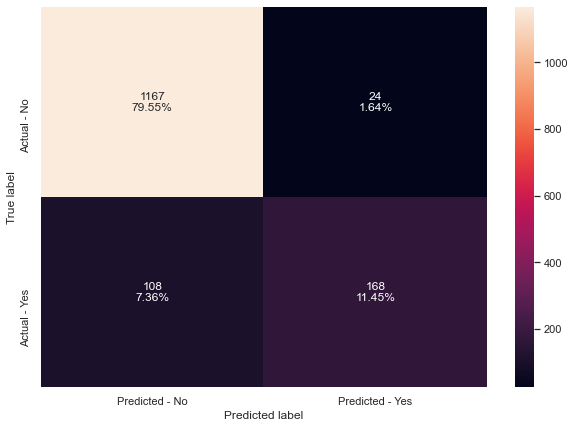

In [170]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [172]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [173]:
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9161554192229039
Recall on training set :  1.0
Recall on test set :  0.5905797101449275
Precision on training set :  1.0
Precision on test set :  0.9421965317919075


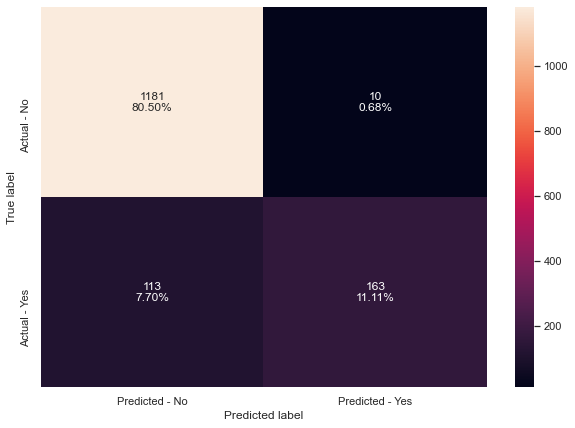

In [174]:
make_confusion_matrix(rf_estimator,y_test)

### Notes:

Both bagging and random forest classifier overfit. Recall on training set is too far apart from recall in the test set 
(0.97 vs 0.60 in bagging and 1.0 vs 0.59 in random forest). Both models have similar performance.

## <a id = "link5"></a> Model performance evaluation and improvement

### Model Tuning - Bagging

In [175]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [176]:
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9188820722563054
Recall on training set :  1.0
Recall on test set :  0.6123188405797102
Precision on training set :  1.0
Precision on test set :  0.9337016574585635


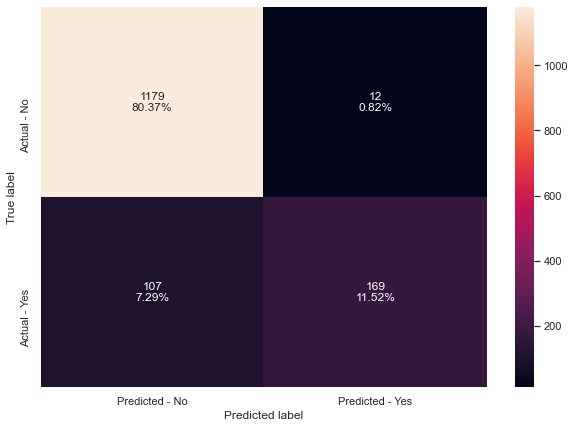

In [177]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Notes:
Pretty good scores on accuracy and precision, however recall numbers arestill not good. The model predics better those customers who will not buy the package.

In [178]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [179]:
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8368897983045893
Accuracy on test set :  0.8329925017041582
Recall on training set :  0.16459627329192547
Recall on test set :  0.14492753623188406
Precision on training set :  0.8412698412698413
Precision on test set :  0.8163265306122449


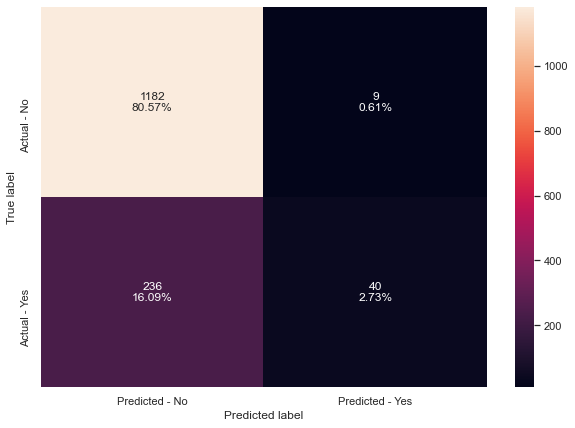

In [180]:
make_confusion_matrix(bagging_lr,y_test)

### Notes:
Here the training and testing numbers are closer together in accuracy, recall and precision. However the model is underfit. Recall score are very low(only 0.14 on test)

### Model Tuning - Random Forest

In [182]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

In [183]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9082139725226542
Accuracy on test set :  0.8738922972051807
Recall on training set :  0.5450310559006211
Recall on test set :  0.40942028985507245
Precision on training set :  0.9435483870967742
Precision on test set :  0.837037037037037


In [184]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=9,
                       n_estimators=200, random_state=1)

In [185]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.8935983630517392
Accuracy on test set :  0.8779822767552828
Recall on training set :  0.6475155279503105
Recall on test set :  0.5579710144927537
Precision on training set :  0.7527075812274369
Precision on test set :  0.7298578199052133


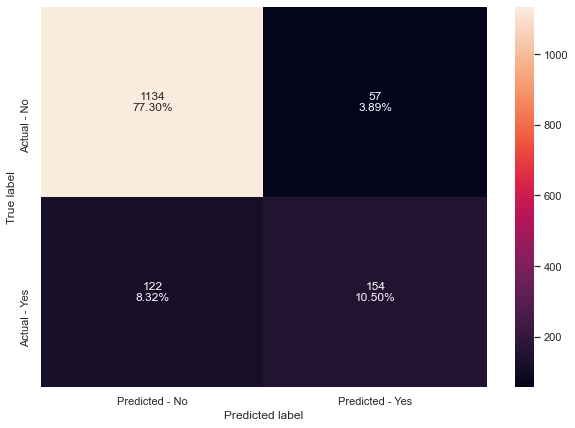

In [186]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Notes:
This is a better model than before. Accuracy, recall and precision are close on training and testing data. 
Recall is 0.55 on test data vs 0.64 on training set.

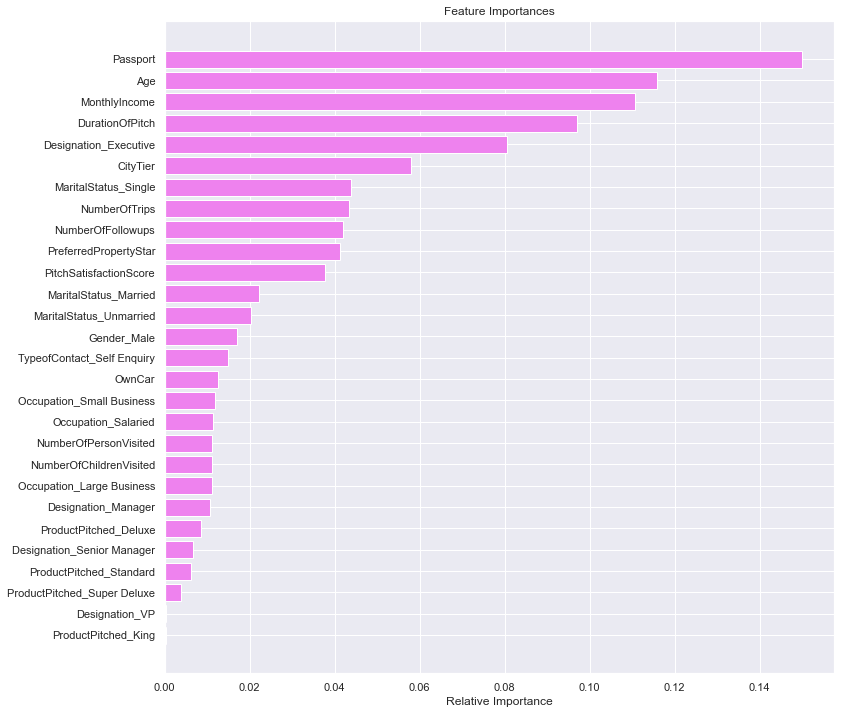

In [187]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Notes:
The strongest indicators above are passport, age, monthly income and duration of pitch. This is consistent with EDA.

In [188]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [189]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,1.00,0.91,0.97,0.61,1.00,0.88
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.61,1.00,0.93
2,Bagging classifier with base_estimator=LR,0.84,0.83,0.16,0.14,0.84,0.82
3,Random Forest with deafult parameters,1.00,0.92,1.00,0.59,1.00,0.94
4,Tuned Random Forest Classifier,0.91,0.87,0.55,0.41,0.94,0.84
5,Random Forest with class_weights,0.89,0.88,0.65,0.56,0.75,0.73


### Notes:
According to the chart above, the best model so far is the random forest with class weights.

### Decision Tree

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=1, max_features='sqrt',
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

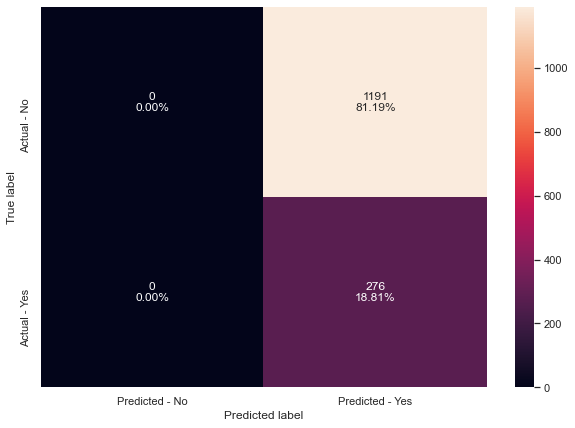

In [193]:
make_confusion_matrix(estimator,y_test)

In [194]:
get_recall_score(estimator)

Recall on training set :  1.0
Recall on test set :  1.0


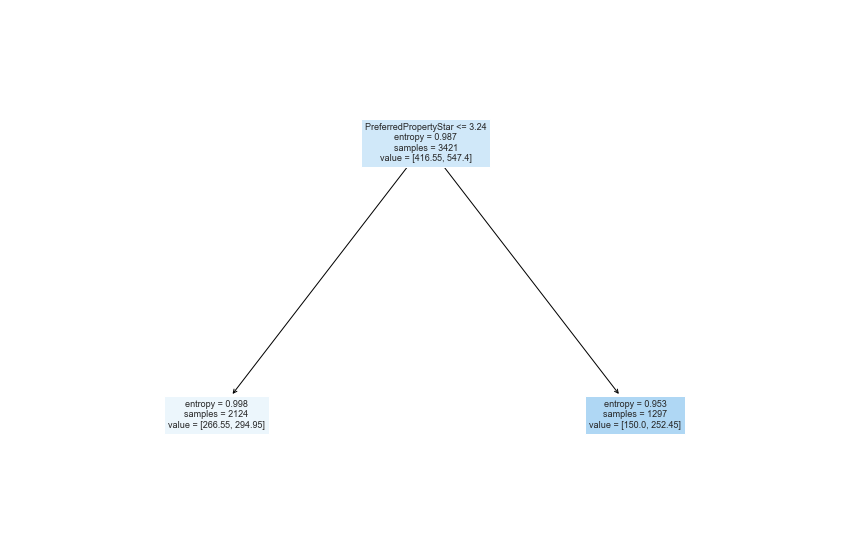

In [195]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [196]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- PreferredPropertyStar <= 3.24
|   |--- weights: [266.55, 294.95] class: 1
|--- PreferredPropertyStar >  3.24
|   |--- weights: [150.00, 252.45] class: 1



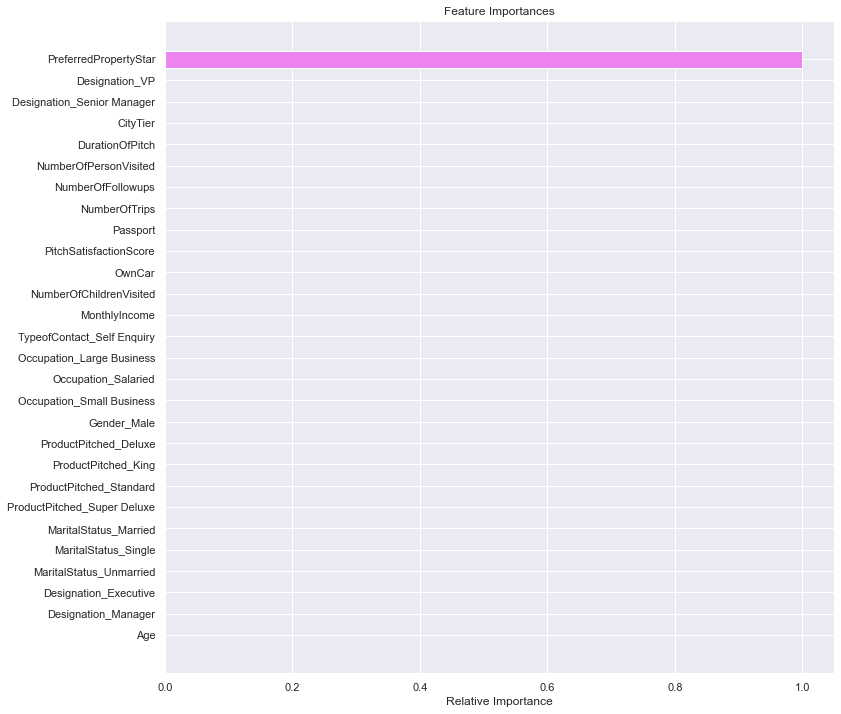

In [198]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Notes: 
The decision tree model shows as a very bad model. This is probably due to the fact that the data is highly imbalanced.

## <a id = "link6"></a> Model building - Boosting

### AdaBoost Classifier

In [202]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [203]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.844489915229465
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.31832298136645965
Recall on test set :  0.32608695652173914
Precision on training set :  0.6879194630872483
Precision on test set :  0.7258064516129032


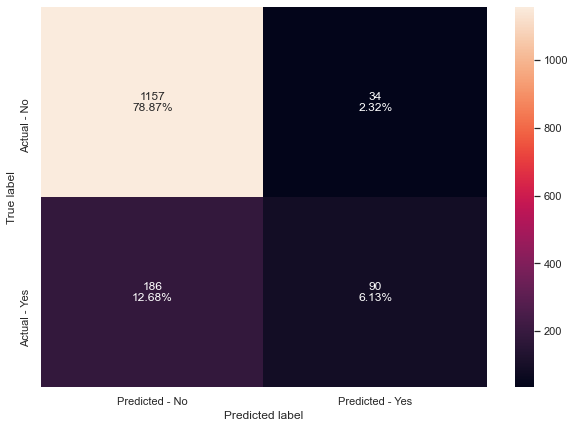

In [204]:
make_confusion_matrix(abc,y_test)

### Notes:
This model shows a very low recall score 0.31 on training vs.0.32 on testing. 

### Gradient Boosting Classifier

In [205]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [206]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8830751242326805
Accuracy on test set :  0.8684389911383776
Recall on training set :  0.43788819875776397
Recall on test set :  0.40217391304347827
Precision on training set :  0.88125
Precision on test set :  0.7985611510791367


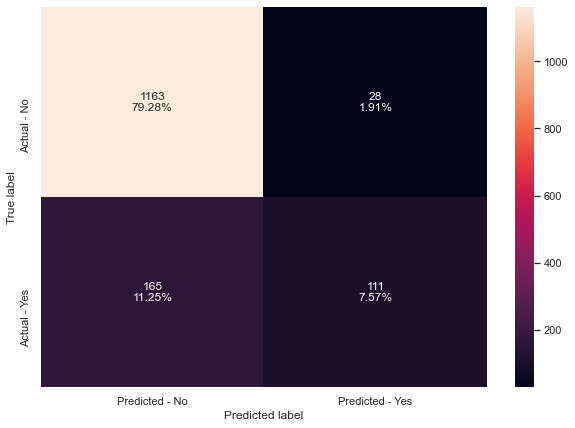

In [207]:
make_confusion_matrix(gbc,y_test)

### Notes:
The recall scores are a little higher for this model (o.43 on training and 0.40 on testing), but let's see if we can make a better model.

### XGBoost Classifier

In [208]:
xgb = XGBClassifier(random_state=1, eval_metric = 'logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [209]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9263803680981595
Recall on training set :  0.9984472049689441
Recall on test set :  0.6920289855072463
Precision on training set :  1.0
Precision on test set :  0.8925233644859814


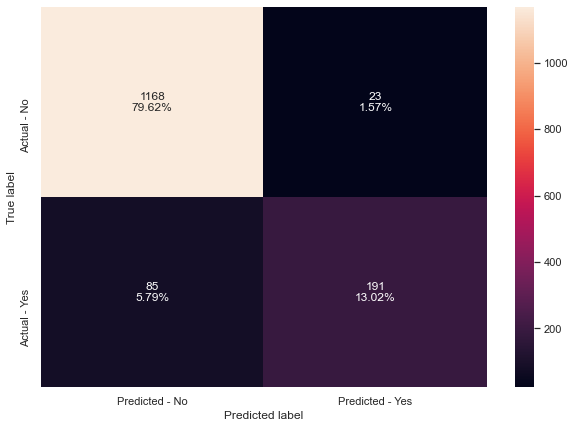

In [210]:
make_confusion_matrix(xgb,y_test)

### Notes:
Recall improved with this model. However, the model overfits on training data.

## <a id = "link7"></a> Model performance evaluation and improvement

In [211]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.1, n_estimators=100, random_state=1)

In [212]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9865536392867582
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.953416149068323
Recall on test set :  0.6014492753623188
Precision on training set :  0.9746031746031746
Precision on test set :  0.6859504132231405


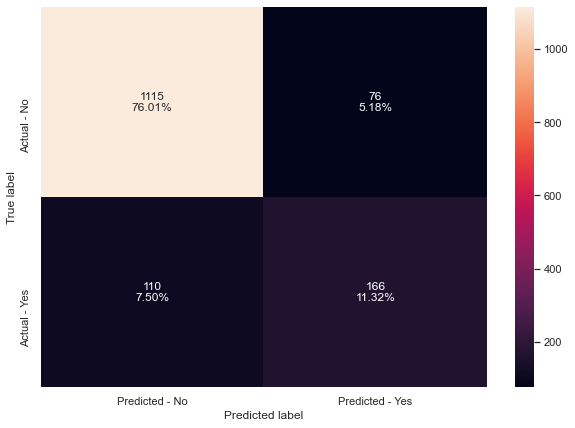

In [213]:
make_confusion_matrix(abc_tuned,y_test)

### Notes:
This model still overfits the data significantly.

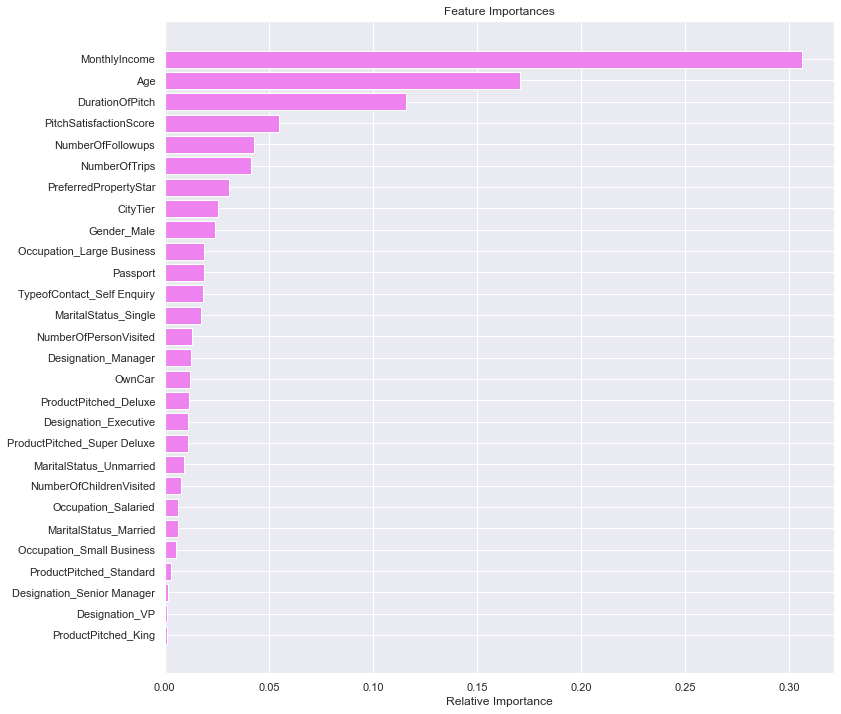

In [214]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [215]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [216]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8865828705057001
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.4518633540372671
Recall on test set :  0.38405797101449274
Precision on training set :  0.8926380368098159
Precision on test set :  0.7969924812030075


In [217]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

In [218]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9196141479099679
Accuracy on test set :  0.8807089297886844
Recall on training set :  0.6086956521739131
Recall on test set :  0.5108695652173914
Precision on training set :  0.944578313253012
Precision on test set :  0.7790055248618785


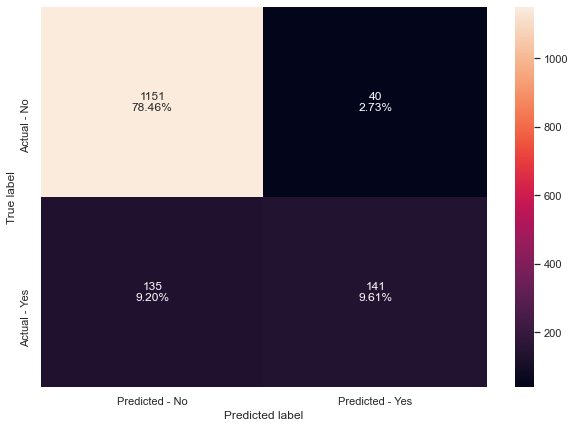

In [219]:
make_confusion_matrix(gbc_tuned,y_test)

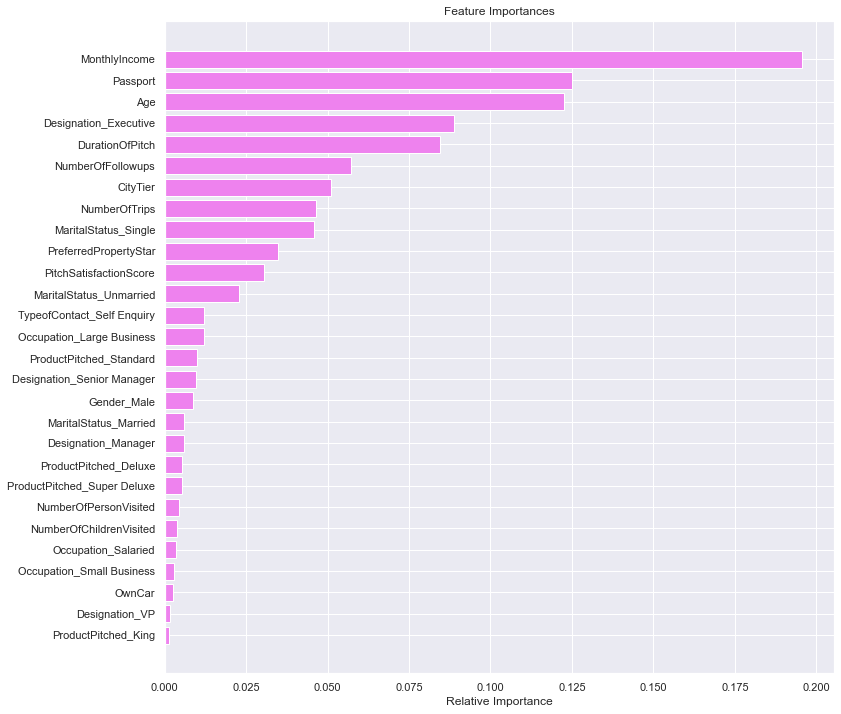

In [220]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [223]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric = 'logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=16,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [224]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9342297573808828
Accuracy on test set :  0.8738922972051807
Recall on training set :  0.9704968944099379
Recall on test set :  0.8188405797101449
Precision on training set :  0.7521058965102286
Precision on test set :  0.6260387811634349


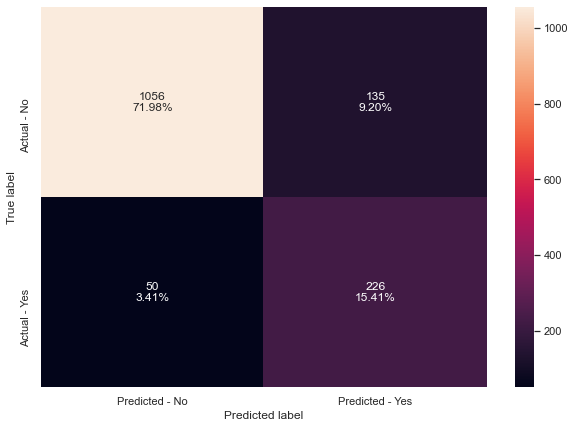

In [225]:
make_confusion_matrix(xgb_tuned,y_test)

### Notes:
Performance of this model is the best we have seen. Recall on training is 0.97 vs 0.81. Accuracy and precision are fairly good as well. The model still overfits a little on training data, however overall, the model shows the best balance between the metrics and the best recall score.

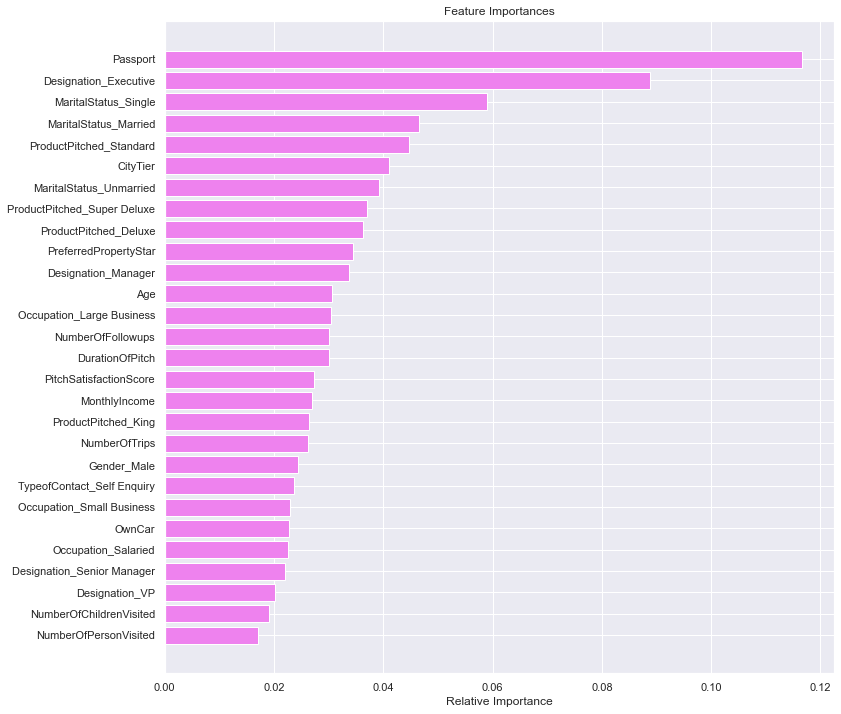

In [226]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Notes:
Top 3 important features according to this model are passport, designation executive and marital status single.

In [227]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [228]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.84,0.85,0.32,0.33,0.69,0.73
1,AdaBoost Tuned,0.99,0.87,0.95,0.60,0.97,0.69
2,Gradient Boosting with default parameters,0.88,0.87,0.44,0.40,0.88,0.80
3,Gradient Boosting with init=AdaBoost,0.89,0.87,0.45,0.38,0.89,0.80
4,Gradient Boosting Tuned,0.92,0.88,0.61,0.51,0.94,0.78
5,XGBoost with default parameters,1.00,0.93,1.00,0.69,1.00,0.89
6,XGBoost Tuned,0.93,0.87,0.97,0.82,0.75,0.63


### Notes:
XGBoost Tuned is the best model we have seen amongst boosting models and all models that performed so far. The model has the best recall scores that are fairly close together (Recall on training is 0.97 vs 0.81 on test). Accuracy and precision are fairly good as well. Overall, the model shows the best balance between the metrics.

## <a id = "link8"></a> Actionable Insights and Recommendations

There are multiple ways a company could approch developing a new travel package.
For example, one way would be to define customer segments and develop travel packages according to the financial means
and life style preferences of customer groups.

For instance, the bulk of the customers in their 30s and 40s with families and no passports is underserved. A wellness travel package for mid-life professionals with a focus on couples and family fun could be successful. The package could feature 3-4 star hotels and activities such as skiing, hiking, and camping in various domestic destinations. 
This package could be potentially sold to the same customer several times a year.

Alternatively, the company may focus on advertising international travel to single/unmaried customers with a passport, since those customers historically were more likely to purchase a package. However, 30% of all customers have a passport and previous success rate was just under 20%. There is potential to increase active customers by as much as 10%.